<a href="https://colab.research.google.com/github/ombhope/ma22c030_2023_pl/blob/main/Assignment%2011/MA22C030PLA11(Ehrenfest__though_experiment).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx



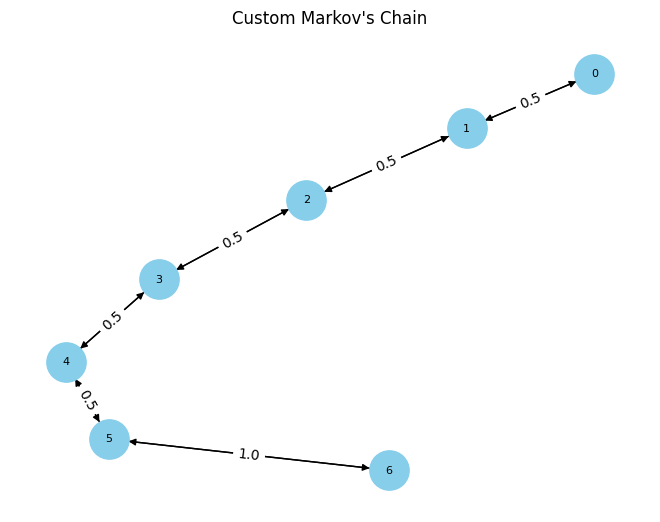

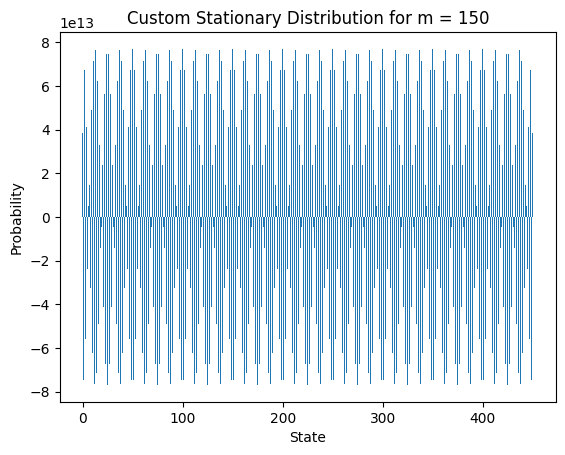

In [3]:
def generate_custom_transition_matrix(m):
    num_states_m = 3 * m + 1
    P_m = np.zeros((num_states_m, num_states_m))

    for i in range(num_states_m):
        if i == 0:
            P_m[i][i + 1] = 1
        elif i == num_states_m - 1:
            P_m[i][i - 1] = 1
        else:
            P_m[i][i - 1] = 0.5
            P_m[i][i + 1] = 0.5

    return P_m



In [4]:
# Test the function for m = 3
transition_matrix_custom = generate_custom_transition_matrix(3)

transition_matrix_custom

P_custom = np.array([[0. , 1. , 0. , 0. , 0. , 0. , 0. ],
                    [0.5, 0. , 0.5, 0. , 0. , 0. , 0. ],
                    [0. , 0.5, 0. , 0.5, 0. , 0. , 0. ],
                    [0. , 0. , 0.5, 0. , 0.5, 0. , 0. ],
                    [0. , 0. , 0. , 0.5, 0. , 0.5, 0. ],
                    [0. , 0. , 0. , 0. , 0.5, 0. , 0.5],
                    [0. , 0. , 0. , 0. , 0. , 1. , 0. ]])

gP_custom = nx.from_numpy_array(P_custom, create_using=nx.DiGraph)



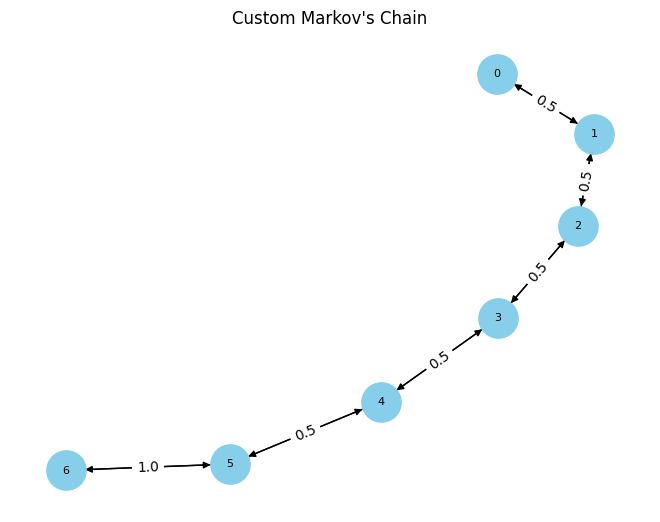

In [5]:
def plot_custom_gph(g_custom):
    pos_custom = nx.spring_layout(g_custom)
    nx.draw(g_custom, pos_custom, with_labels=True, node_color='skyblue', node_size=800, font_size=8, font_color='black')
    labels_custom = nx.get_edge_attributes(g_custom, 'weight')
    nx.draw_networkx_edge_labels(g_custom, pos_custom, edge_labels=labels_custom)

plt.figure()
plot_custom_gph(gP_custom)
plt.title("Custom Markov's Chain")
plt.show()



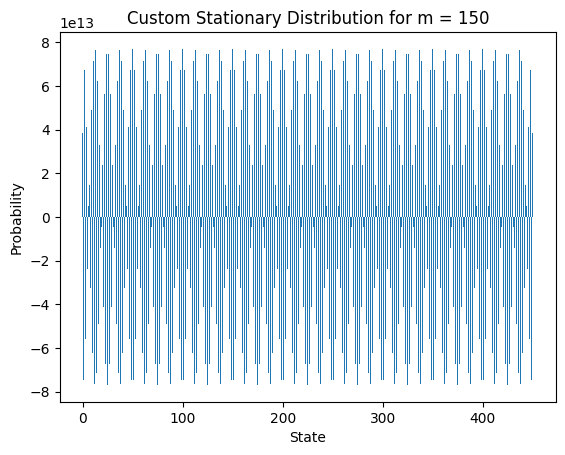

In [6]:
transition_matrix_custom

def custom_stat_distribution(transition_matrix_custom):
    eigvals_custom, eigvecs_custom = np.linalg.eig(transition_matrix_custom.T)
    return eigvecs_custom[:, 0] / eigvecs_custom[:, 0].sum()

m_custom = 150
stationary_custom = custom_stat_distribution(generate_custom_transition_matrix(m_custom))
states_custom = np.arange(3 * m_custom + 1)

plt.figure()
plt.bar(states_custom, stationary_custom)
plt.title(f"Custom Stationary Distribution for m = {m_custom}")
plt.xlabel("State")
plt.ylabel("Probability")
plt.show()
